## Example 5a: Basic Solute Transport: Solute Introduced through a Constant Flux Boundary

This notebook represents the steps to replicate example 5a from: * David Rassam, Jirka Šimůnek, Dirk Mallants,and Martinus Th. van Genuchten, The HYDRUS-1D Software Package for Simulating the One-Dimensional Movement of Water, Heat, and Multiple Solutes in Variably-Saturated Media* \
Tutorial \
Version 1.00, July 2018

This example provides insctructions to create a Pydrus model that simulates water flow and solute transport through a 300-cm deep uniform soil profile. The soil profile is initially solute free. Water is infiltrated into the soil at a  constant flux of 5 cm/d. The infiltrating water a uni solute concentration during the first 10 days and is solute free during the second 10 days. \
The upper boundary and lower boundary are represented with: 

* Upper BC: Constant Flux (rtop = 5).
* Bottom BC: Free Drainage (groundwater table is assumed to be deep enough to not influence water redistributions in the soil profile). 

### 1. Import the Pydrus package

In [1]:
import os
import numpy as np
import pandas as pd
import phydrus as ps
%matplotlib inline

### 2. Create the basic model & add time information basic model

In [2]:
# Folder for Hydrus files to be stored
ws = "example_5a"
# Path to folder containing hydrus.exe 
exe = os.path.join(os.getcwd(),"../../source/hydrus.exe")  
# Description
desc = "Solute Introduced through a Constant Flux Boundary"
# Create model
ml = ps.Model(exe_name=exe, ws_name=ws, name="model", description=desc, 
              mass_units="mmol", time_unit="days", length_unit="cm")
#ml.basic_info["lFlux"] = True
ml.basic_info["lShort"] = False
time=np.arange(2,22,2)
times = ml.add_time_info(print_times=True,tmax = 20, print_array=time, 
                         dt=0.001)

### 3. Add processes and materials

In [3]:
ml.add_waterflow(top_bc=1, bot_bc=4, linitw=False, rtop=-5)
ml.add_solute_transport(tpulse=10, maxit=1)

m = ml.get_empty_material_df(n=1)
m.loc[[1]] = [[0.078, 0.43, 0.036, 1.56, 24.96, 0.5, 1.5, 30, 1, 0]]
ml.add_material(m)

### 4. Add profile information

In [4]:
elements = 100  # Disctretize soil column into n elements
depth = -300  # Depth of the soil column
ihead = -100  # Determine initial Pressure Head
# Create Profile
profile = ps.create_profile(bot=depth, dx=abs(depth / elements), 
                            h=ihead,sconc=0)
ml.add_profile(profile) # Add the profile

### 5. Add observation nodes

In [5]:
ml.add_obs_nodes([0, -150, -300])

### 6. Add atmosphere boundary conditions

In [6]:
bc = {"tAtm": (10, 20), "Prec": (5, 5), "cTop": (1, 0)}
atm = pd.DataFrame(bc, index=(3, 30))
ml.add_atmospheric_bc(atm, hcrits=0, hcrita=100000)

### 6. Add solutes

In [7]:
sol1 = ml.get_empty_solute_df()
sol1["beta"] = 1
ml.add_solute(sol1, difw=0, difg=0, top_conc=1)

### 7. Write hydrus input files and run hydrus

In [8]:
ml.write_input()
rs = ml.simulate()

### 8. Plot results

<AxesSubplot:xlabel='Time [days]', ylabel='Conc'>

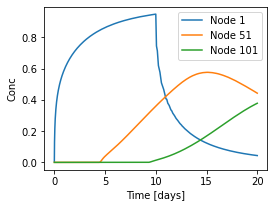

In [9]:
ml.plots.obs_points(data="Conc")

<AxesSubplot:xlabel='c [mmol/cm*3]', ylabel='Depth [cm]'>

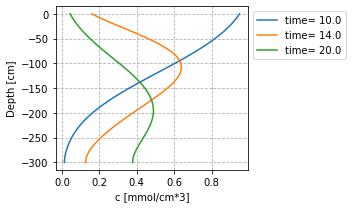

In [10]:
ml.plots.profile_information("Concentration", times=[10, 14, 20])

<AxesSubplot:xlabel='Time'>

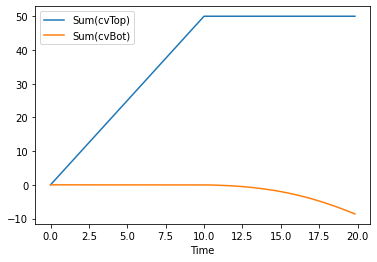

In [11]:
import matplotlib.pyplot as plt
df = ml.read_solutes()
df.columns
fig,ax=plt.subplots()
df = df.set_index(pd.to_numeric(df.index, errors='coerce'))
df.plot(y="Sum(cvTop)", ax=ax, use_index=True)
df.plot(y="Sum(cvBot)", ax=ax, use_index=True)